In [1]:
import pandas as pd
import numpy as np
import os
import glob
from google.colab import drive
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import seaborn as sb
drive.mount('/content/drive')

Mounted at /content/drive


# Bow-Tie Tests Data

## Spreadsheet
https://medium.com/mlearning-ai/how-to-access-google-sheets-on-google-colaboratory-8766b3a0996f

https://stackoverflow.com/questions/46081457/pandas-add-seconds-from-a-column-to-datetime-in-other-column

In [2]:
!ls '/content/drive/MyDrive/Daniel_Thesis/01_Data/Bow_tie/'

MPT		photos_bowtie_test     thermometer_datalog.TXT
MPT_data.ipynb	Test_specimens.gsheet


In [ ]:
from google.colab import auth
auth.authenticate_user()
import gspread
from google.auth import default

In [14]:
creds, _ = default()
gc = gspread.authorize(creds)
worksheet = gc.open('Test_specimens').sheet1
rows = worksheet.get_all_values()
df = pd.DataFrame(rows[1:],columns=rows[0])
df

,ID,Max load (lb),l (in),t1 (in),l1 (in),t2 (in),l2 (in),t3 (in),l3 (in),t4 (in),l4 (in),A (in^2),Shear Strength (psi),t_avg (in),l_avg (in),Slat weight (g),After oven (g),MC (%),Comments
0,2.7.3,,,0.306,3.071,0.310,3.094,0.315,3.114,0.300,3.123,3.815,0.000,0.308,3.100,31.88,28.62,11.39%,
1,3.10.4,,,0.274,2.739,0.279,2.714,0.277,2.731,0.285,2.761,3.047,0.000,0.278,2.736,21.47,19.15,12.11%,
2,3.3.2,,,0.435,2.835,0.429,2.843,0.422,2.816,0.430,2.826,4.856,0.000,0.429,2.830,35.08,31.35,11.90%,
3,3.13.3,2797,,0.253,2.688,0.238,2.686,0.249,2.652,0.250,2.641,2.636,1061.250,0.247,2.666,20.6,18.48,11.47%,
4,3.8.4,,,0.322,2.590,0.322,2.601,0.297,2.590,0.319,2.566,3.256,0.000,0.315,2.586,26.97,24.17,11.58%,
5,3.1.2,8655,,0.535,2.822,0.522,2.796,0.558,2.805,0.551,2.812,6.080,1423.521,0.541,2.808,35.86,32.06,11.85%,
6,3.17.4,4464,,0.214,2.410,0.231,2.414,0.211,2.442,0.217,2.443,2.116,2109.501,0.218,2.427,13.64,12.27,11.17%,
7,3.19.3,3050,,0.216,2.224,0.212,2.224,0.211,2.245,0.211,2.240,1.898,1606.779,0.213,2.233,11.22,10.02,11.98%,
8,2.7.4,3662,,0.296,2.938,0.269,2.936,0.281,2.926,0.283,2.933,3.308,1107.057,0.282,2.933,26.33,23.65,11.33%,
9,26.6,,,0.268,2.973,0.292,2.984,0.270,2.979,0.252,2.970,3.219,0.000,0.270,2.976,25.52,22.87,11.59%,Conceptual test. Some AC effect due to 48 hour...


# MPT data

In [17]:
folder  = '/content/drive/MyDrive/Daniel_Thesis/01_Data/Bow_tie/MPT'
paths   = glob.glob(os.path.join(folder,'*'))

In [74]:
def dat2df(dat_path,print_time=False):
    '''
    convierte el archivo *.dat, generado por la UTM, en dataframe.
    toma solo las dos primeras columnas
    '''
    f = open(dat_path, 'r')
    lines = f.readlines()
    data = []
    header = 9999
    for i, l in enumerate(lines):
        if 'Data Acquisition' in l:
            header = 9999
            ini = l.find('Time')
            start_date = l[ini:].split('\n')[0].split('\t')[-1]
            if print_time:
                print(start_date)
        
        if 'Axial Force' in l:
            header = i+1
            columns = l.split('\n')[0].split('\t')[:2]
            units = lines[i+1].split('\n')[0].split('\t')[:2]
            columns = [columns[0]+'_'+units[0],columns[1]+'_'+units[1],'start_date']
            
        if i > header:
            if len(l.split('\t')) == 3:
                data.append(l.split('\n')[0].split('\t')[:2]+[start_date])
    
    df = pd.DataFrame(data,columns=columns)
    df[df.columns[0]] = pd.to_numeric(df[df.columns[0]])
    df[df.columns[1]] = pd.to_numeric(df[df.columns[1]])
    df['duration'] = pd.to_timedelta(df[df.columns[0]], unit='s')
    df['start_date'] = pd.to_datetime(df['start_date'])
    df['date_time'] = df['start_date'] + df['duration']
    return df

In [75]:
df_load = dat2df(paths[0])

In [76]:
df_load

,Time_s,Axial Force_lbf,start_date,duration,date_time
0,0.512695,-91.740173,2022-07-12 08:55:13,0 days 00:00:00.512695310,2022-07-12 08:55:13.512695310
1,1.012695,-125.801740,2022-07-12 08:55:13,0 days 00:00:01.012695300,2022-07-12 08:55:14.012695300
2,1.512695,-159.891240,2022-07-12 08:55:13,0 days 00:00:01.512695299,2022-07-12 08:55:14.512695299
3,2.012695,-192.865680,2022-07-12 08:55:13,0 days 00:00:02.012695300,2022-07-12 08:55:15.012695300
4,2.512695,-225.843220,2022-07-12 08:55:13,0 days 00:00:02.512695299,2022-07-12 08:55:15.512695299
...,...,...,...,...,...
270,135.512700,-11.011741,2022-07-12 08:55:13,0 days 00:02:15.512700,2022-07-12 08:57:28.512700000
271,136.012700,-10.721116,2022-07-12 08:55:13,0 days 00:02:16.012700,2022-07-12 08:57:29.012700000
272,136.512700,-10.917521,2022-07-12 08:55:13,0 days 00:02:16.512700,2022-07-12 08:57:29.512700000
273,137.012700,-10.851875,2022-07-12 08:55:13,0 days 00:02:17.012700,2022-07-12 08:57:30.012700000


In [77]:
paths[0]

'/content/drive/MyDrive/Daniel_Thesis/01_Data/Bow_tie/MPT/prueba de control bambu chacon3  -12-7-2022.dat'

In [87]:
out_folder = '/content/drive/MyDrive/Daniel_Thesis/01_Data/Bow_tie/MPT/data_csv'
os.makedirs(out_folder,exist_ok=True)
max = []
for path in tqdm(paths):
    try:
        df_load = dat2df(path)
        max.append(df_load['Axial Force_lbf'].abs().max())
        file_name = os.path.basename(path).split('.dat')[0]
        df_load.to_csv(os.path.join(out_folder,file_name+'.csv'),index=False)
    except ValueError as err:
        print('**\texception:\n',err,'\n',path)
        max.append(np.nan)

  0%|          | 0/58 [00:00<?, ?it/s]

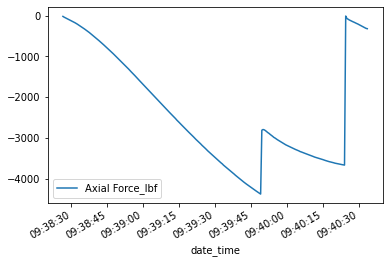

In [86]:
df_load.plot('date_time','Axial Force_lbf')

In [82]:
df_MPT = pd.DataFrame(paths,columns=['path'])
df_MPT['bname'] = [os.path.basename(df_MPT.path[i]) for i in df_MPT.index]
df_MPT.drop(0,inplace=True)
df_MPT[['specimen_id','date']] = [df_MPT.bname[i].split('_')[1:] for i in df_MPT.index]
df_MPT.date = [s.replace('.dat','') for s in df_MPT.date]
df_MPT.date = pd.to_datetime(df_MPT.date)

In [83]:
df_MPT['max_load'] = max[1:]

In [84]:
df_MPT

,path,bname,specimen_id,date,max_load
1,/content/drive/MyDrive/Daniel_Thesis/01_Data/B...,BowTie_2.7.3_12-7-2022.dat,2.7.3,2022-12-07,5542.3296
2,/content/drive/MyDrive/Daniel_Thesis/01_Data/B...,BowTie_3.3.2_13-7-2022.dat,3.3.2,2022-07-13,9368.8350
3,/content/drive/MyDrive/Daniel_Thesis/01_Data/B...,BowTie_3.10.4_13-7-2022.dat,3.10.4,2022-07-13,4331.9946
4,/content/drive/MyDrive/Daniel_Thesis/01_Data/B...,BowTie_3.13.3_13-7-2022.dat,3.13.3,2022-07-13,2793.1077
5,/content/drive/MyDrive/Daniel_Thesis/01_Data/B...,BowTie_3.8.4_13-7-2022.dat,3.8.4,2022-07-13,5915.0020
6,/content/drive/MyDrive/Daniel_Thesis/01_Data/B...,BowTie_3.1.2_13-7-2022.dat,3.1.2,2022-07-13,8654.2236
7,/content/drive/MyDrive/Daniel_Thesis/01_Data/B...,BowTie_3.17.4_13-7-2022.dat,3.17.4,2022-07-13,4445.3950
8,/content/drive/MyDrive/Daniel_Thesis/01_Data/B...,BowTie_3.19.3_13-7-2022.dat,3.19.3,2022-07-13,3048.5322
9,/content/drive/MyDrive/Daniel_Thesis/01_Data/B...,BowTie_2.7.4_13-7-2022.dat,2.7.4,2022-07-13,3650.7056
10,/content/drive/MyDrive/Daniel_Thesis/01_Data/B...,BowTie_2.18.3_13-7-2022.dat,2.18.3,2022-07-13,2719.4968


In [89]:
df_MPT.specimen_id.unique()

array(['2.7.3', '3.3.2', '3.10.4', '3.13.3', '3.8.4', '3.1.2', '3.17.4',
       '3.19.3', '2.7.4', '2.18.3', '3.15.1', '2.0.1', '3.8.1', '2.3.3',
       '2.3.4', '3.19.2', '2.18.4', '3.19.4', '3.13.1', '3.3.4', '3.8.3',
       '2.15.1', '2.12.3', '3.5.3', '3.1.1', '2.15.4', '2.1.3', '3.1.3',
       '3.8.2', '3.10.3', '2.9.3', '2.15.2', '2.18.2', '2.18.1', '3.13.4',
       '2.3.2', '3.5.4', '2.12.2', '2.7.1', '3.3.1', '2.7.2', '2.13.2',
       '3.13.2', '3.17.2', '3.17.3', '2.15.3', '3.19.1', '3.3.3', '2.9.1',
       '3.10.1', '3.5.2', '3.15.2', '2.9.4', '2.12.4', '2.9.2', '2.12.1',
       '3.17.1'], dtype=object)

In [90]:
df.ID.unique()

array(['2.7.3', '3.10.4', '3.3.2', '3.13.3', '3.8.4', '3.1.2', '3.17.4',
       '3.19.3', '2.7.4', '26.6', '2.18.3', '2.0.1', '3.15.1', '3.8.1',
       '2.3.3', '2.3.4', '3.19.2', '2.18.4', '3.19.4', '3.13.1', '3.3.4',
       '3.8.3', '2.15.1', '2.12.3', '3.5.3', '3.1.1', '2.15.4', '3.1.3',
       '2.13.1', '3.8.2', '3.10.3', '2.9.3', '2.15.2', '2.18.2', '2.18.1',
       '3.13.4', '2.3.2', '3.5.4', '2.12.2', '2.7.1', '3.3.1', '2.7.2',
       '2.13.2', '3.13.2', '3.17.2', '3.17.3', '2.15.3', '3.19.1',
       '3.5.1', '2.3.1', '3.3.3', '2.9.1', '3.10.1', '3.5.2', '3.15.2',
       '2.9.4', '2.12.4', '2.9.2', '3.17.1', '2.12.1'], dtype=object)

In [94]:
df_MPT.loc[df_MPT.specimen_id=='2.7.3','specimen_id'].values[0]

'2.7.3'

In [96]:
for id in df.ID.unique():
  try:
    df.loc[df.ID==id,'max_load (lbf)'] = df_MPT.loc[df_MPT.specimen_id==id,'max_load'].values[0]
  except:
    df.loc[df.ID==id,'max_load (lbf)'] = np.nan
df

,ID,Max load (lb),l (in),t1 (in),l1 (in),t2 (in),l2 (in),t3 (in),l3 (in),t4 (in),l4 (in),A (in^2),Shear Strength (psi),t_avg (in),l_avg (in),Slat weight (g),After oven (g),MC (%),Comments,max_load (lbf)
0,2.7.3,,,0.306,3.071,0.310,3.094,0.315,3.114,0.300,3.123,3.815,0.000,0.308,3.100,31.88,28.62,11.39%,,5542.3296
1,3.10.4,,,0.274,2.739,0.279,2.714,0.277,2.731,0.285,2.761,3.047,0.000,0.278,2.736,21.47,19.15,12.11%,,4331.9946
2,3.3.2,,,0.435,2.835,0.429,2.843,0.422,2.816,0.430,2.826,4.856,0.000,0.429,2.830,35.08,31.35,11.90%,,9368.8350
3,3.13.3,2797,,0.253,2.688,0.238,2.686,0.249,2.652,0.250,2.641,2.636,1061.250,0.247,2.666,20.6,18.48,11.47%,,2793.1077
4,3.8.4,,,0.322,2.590,0.322,2.601,0.297,2.590,0.319,2.566,3.256,0.000,0.315,2.586,26.97,24.17,11.58%,,5915.0020
5,3.1.2,8655,,0.535,2.822,0.522,2.796,0.558,2.805,0.551,2.812,6.080,1423.521,0.541,2.808,35.86,32.06,11.85%,,8654.2236
6,3.17.4,4464,,0.214,2.410,0.231,2.414,0.211,2.442,0.217,2.443,2.116,2109.501,0.218,2.427,13.64,12.27,11.17%,,4445.3950
7,3.19.3,3050,,0.216,2.224,0.212,2.224,0.211,2.245,0.211,2.240,1.898,1606.779,0.213,2.233,11.22,10.02,11.98%,,3048.5322
8,2.7.4,3662,,0.296,2.938,0.269,2.936,0.281,2.926,0.283,2.933,3.308,1107.057,0.282,2.933,26.33,23.65,11.33%,,3650.7056
9,26.6,,,0.268,2.973,0.292,2.984,0.270,2.979,0.252,2.970,3.219,0.000,0.270,2.976,25.52,22.87,11.59%,Conceptual test. Some AC effect due to 48 hour...,NaN


In [98]:
df[pd.isnull(df['max_load (lbf)'])].ID

9       26.6
28    2.13.1
48     3.5.1
49     2.3.1
Name: ID, dtype: object

In [100]:
df_MPT.specimen_id.values

array(['2.7.3', '3.3.2', '3.10.4', '3.13.3', '3.8.4', '3.1.2', '3.17.4',
       '3.19.3', '2.7.4', '2.18.3', '3.15.1', '2.0.1', '3.8.1', '2.3.3',
       '2.3.4', '3.19.2', '2.18.4', '3.19.4', '3.13.1', '3.3.4', '3.8.3',
       '2.15.1', '2.12.3', '3.5.3', '3.1.1', '2.15.4', '2.1.3', '3.1.3',
       '3.8.2', '3.10.3', '2.9.3', '2.15.2', '2.18.2', '2.18.1', '3.13.4',
       '2.3.2', '3.5.4', '2.12.2', '2.7.1', '3.3.1', '2.7.2', '2.13.2',
       '3.13.2', '3.17.2', '3.17.3', '2.15.3', '3.19.1', '3.3.3', '2.9.1',
       '3.10.1', '3.5.2', '3.15.2', '2.9.4', '2.12.4', '2.9.2', '2.12.1',
       '3.17.1'], dtype=object)

In [101]:
print(len(df),len(df_MPT.specimen_id.values))

60 57


In [105]:
df['Max load (lb)'] = df['Max load (lb)'].replace('',np.nan)
df['Max load (lb)'] = pd.to_numeric(df['Max load (lb)'])

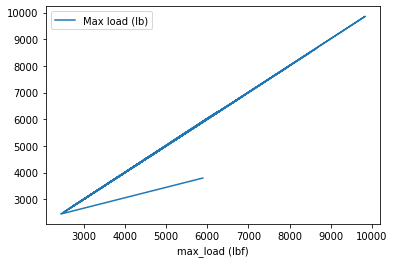

In [106]:
df.plot('max_load (lbf)','Max load (lb)')

In [109]:
df[(df['max_load (lbf)']-df['Max load (lb)']).abs()>50]

,ID,Max load (lb),l (in),t1 (in),l1 (in),t2 (in),l2 (in),t3 (in),l3 (in),t4 (in),l4 (in),A (in^2),Shear Strength (psi),t_avg (in),l_avg (in),Slat weight (g),After oven (g),MC (%),Comments,max_load (lbf)
47,3.19.1,3796.0,2.264,0.223,2.251,0.219,2.254,0.211,2.277,0.235,2.273,2.009,1889.591,0.222,2.264,23.68,21.3,11.17%,,5891.9536


In [110]:
for path in paths:
  if '3.19.1' in path:
    print(path)

/content/drive/MyDrive/Daniel_Thesis/01_Data/Bow_tie/MPT/BowTie_3.19.1_13-7-2022.dat


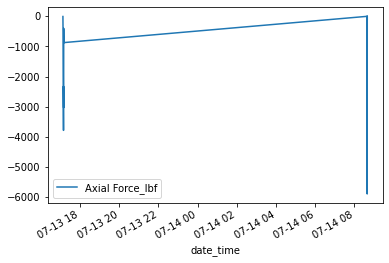

In [112]:
df_error = dat2df('/content/drive/MyDrive/Daniel_Thesis/01_Data/Bow_tie/MPT/BowTie_3.19.1_13-7-2022.dat')
df_error.plot('date_time','Axial Force_lbf')

In [113]:
df[(df['max_load (lbf)']-df['Max load (lb)']).abs()>20]

,ID,Max load (lb),l (in),t1 (in),l1 (in),t2 (in),l2 (in),t3 (in),l3 (in),t4 (in),l4 (in),A (in^2),Shear Strength (psi),t_avg (in),l_avg (in),Slat weight (g),After oven (g),MC (%),Comments,max_load (lbf)
11,2.0.1,6289.0,2.638,0.584,2.626,0.557,2.653,0.566,2.627,0.582,2.660,6.043,1040.641,0.572,2.641,33.18,29.76,11.49%,,6256.7607
12,3.15.1,5100.0,,0.295,2.616,0.280,2.618,0.268,2.617,0.277,2.611,2.925,1743.327,0.280,2.616,20.49,18.44,11.12%,,5074.4600
13,3.8.1,6072.0,2.809,0.358,2.808,0.375,2.811,0.346,2.774,0.367,2.807,4.048,1499.893,0.361,2.800,29.14,26.09,11.69%,,6041.9980
47,3.19.1,3796.0,2.264,0.223,2.251,0.219,2.254,0.211,2.277,0.235,2.273,2.009,1889.591,0.222,2.264,23.68,21.3,11.17%,,5891.9536
51,2.9.1,4487.0,2.951,0.288,2.946,0.289,2.941,0.270,2.950,0.270,2.954,3.289,1364.199,0.279,2.947,24.56,21.97,11.79%,,4460.2568


In [114]:
df[pd.isnull(df['max_load (lbf)'])].ID

9       26.6
28    2.13.1
48     3.5.1
49     2.3.1
Name: ID, dtype: object

/content/drive/MyDrive/Daniel_Thesis/01_Data/Bow_tie/MPT/BowTie_3.15.1_13-7-2022.dat


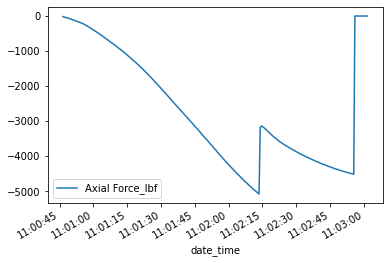

In [115]:
for path in paths:
  if '3.15.1' in path:
    print(path)
    df_error = dat2df(path)
df_error.plot('date_time','Axial Force_lbf')

/content/drive/MyDrive/Daniel_Thesis/01_Data/Bow_tie/MPT/BowTie_2.0.1_13-7-2022.dat


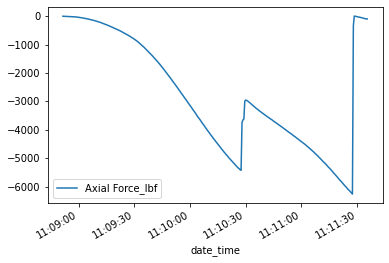

In [116]:
for path in paths:
  if '2.0.1' in path:
    print(path)
    df_error = dat2df(path)
df_error.plot('date_time','Axial Force_lbf')

/content/drive/MyDrive/Daniel_Thesis/01_Data/Bow_tie/MPT/BowTie_3.8.1_13-7-2022.dat


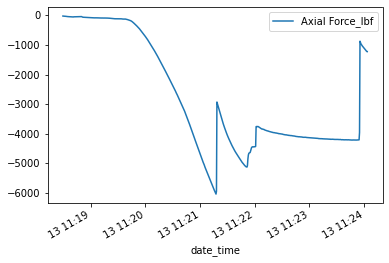

In [117]:
for path in paths:
  if '3.8.1' in path:
    print(path)
    df_error = dat2df(path)
df_error.plot('date_time','Axial Force_lbf')

/content/drive/MyDrive/Daniel_Thesis/01_Data/Bow_tie/MPT/BowTie_2.9.1_13-7-2022.dat


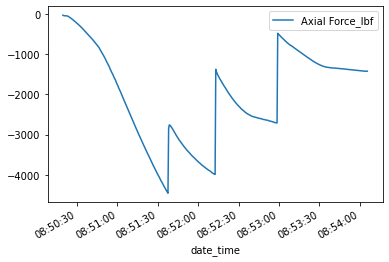

In [118]:
for path in paths:
  if '2.9.1' in path:
    print(path)
    df_error = dat2df(path)
df_error.plot('date_time','Axial Force_lbf')

In [122]:
df.loc[pd.isnull(df['Max load (lb)'])&~pd.isnull(df['max_load (lbf)']),'Max load (lb)'] = df.loc[pd.isnull(df['Max load (lb)'])&~pd.isnull(df['max_load (lbf)']),'max_load (lbf)']

In [128]:
df.columns

Index(['ID', 'Max load (lb)', 'l (in)', 't1 (in)', 'l1 (in)', 't2 (in)',
       'l2 (in)', 't3 (in)', 'l3 (in)', 't4 (in)', 'l4 (in)', 'A (in^2)',
       'Shear Strength (psi)', 't_avg (in)', 'l_avg (in)', 'Slat weight (g)',
       'After oven (g)', 'MC (%)', 'Comments', 'max_load (lbf)'],
      dtype='object')

In [130]:
for col in ['l (in)', 't1 (in)', 'l1 (in)', 't2 (in)',
       'l2 (in)', 't3 (in)', 'l3 (in)', 't4 (in)', 'l4 (in)', 'A (in^2)',
       'Shear Strength (psi)', 't_avg (in)', 'l_avg (in)', 'Slat weight (g)',
       'After oven (g)']:
    df[col] = pd.to_numeric(df[col])

In [132]:
df.loc[(df['Shear Strength (psi)']==0)&~pd.isnull(df['Max load (lb)']),'Shear Strength (psi)'] = df.loc[(df['Shear Strength (psi)']==0)&~pd.isnull(df['Max load (lb)']),'Max load (lb)']/df.loc[(df['Shear Strength (psi)']==0)&~pd.isnull(df['Max load (lb)']),'A (in^2)']

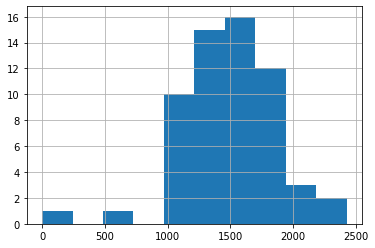

In [134]:
df['Shear Strength (psi)'].hist()

In [135]:
df[df['Shear Strength (psi)'] < 800]

,ID,Max load (lb),l (in),t1 (in),l1 (in),t2 (in),l2 (in),t3 (in),l3 (in),t4 (in),l4 (in),A (in^2),Shear Strength (psi),t_avg (in),l_avg (in),Slat weight (g),After oven (g),MC (%),Comments,max_load (lbf)
9,26.6,NaN,NaN,0.268,2.973,0.292,2.984,0.270,2.979,0.252,2.970,3.219,0.000,0.270,2.976,25.52,22.87,11.59%,Conceptual test. Some AC effect due to 48 hour...,NaN
39,2.7.1,2525.0,2.96,0.320,3.022,0.325,2.964,0.314,2.908,0.318,3.001,3.795,665.287,0.319,2.974,26.71,24.09,10.88%,,2522.4272


/content/drive/MyDrive/Daniel_Thesis/01_Data/Bow_tie/MPT/BowTie_2.7.1_13-7-2022.dat


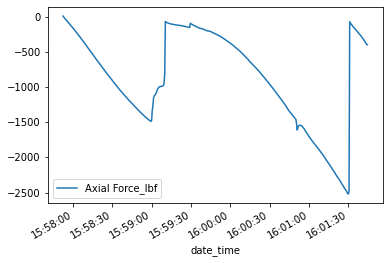

In [136]:
for path in paths:
  if '2.7.1' in path:
    print(path)
    df_error = dat2df(path)
df_error.plot('date_time','Axial Force_lbf')

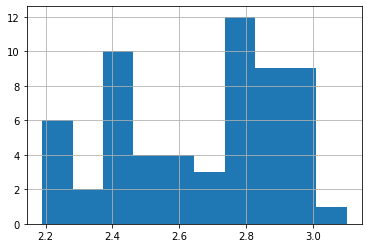

In [137]:
df['l_avg (in)'].hist()

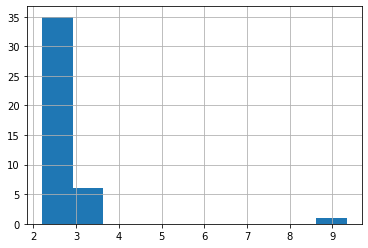

In [139]:
df['l (in)'].hist()

In [142]:
df.loc[df['l (in)']>5,'l (in)'] = df.loc[df['l (in)']>5,'l (in)']/4

/content/drive/MyDrive/Daniel_Thesis/01_Data/Bow_tie/MPT/BowTie_2.18.1_13-7-2022.dat


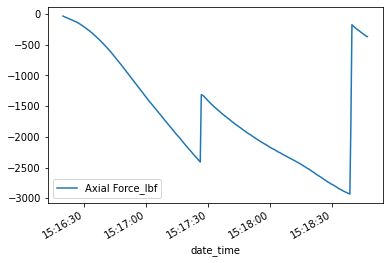

In [141]:
for path in paths:
  if '2.18.1' in path:
    print(path)
    df_error = dat2df(path)
df_error.plot('date_time','Axial Force_lbf')

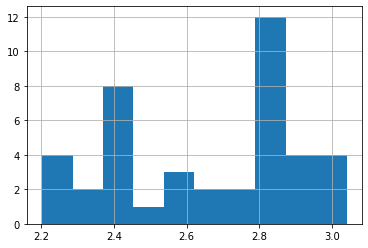

In [143]:
df['l (in)'].hist()

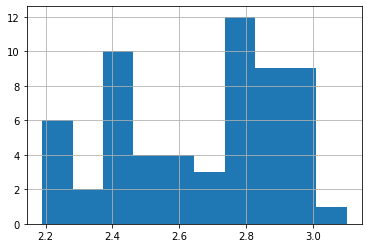

In [144]:
df['l_avg (in)'].hist()

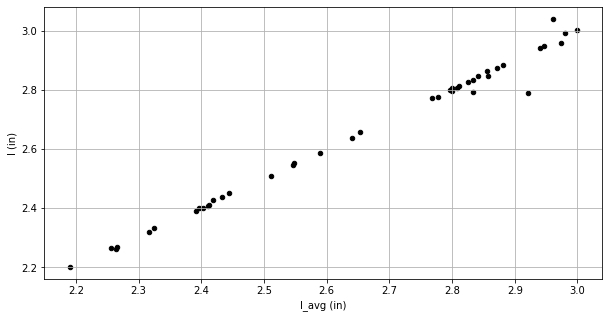

In [145]:
df.plot.scatter('l_avg (in)','l (in)',figsize=(10,5),c='k',grid=True)
plt.show()

In [147]:
df[(df['l (in)']-df['l_avg (in)']).abs()>.02]

,ID,Max load (lb),l (in),t1 (in),l1 (in),t2 (in),l2 (in),t3 (in),l3 (in),t4 (in),l4 (in),A (in^2),Shear Strength (psi),t_avg (in),l_avg (in),Slat weight (g),After oven (g),MC (%),Comments,max_load (lbf)
25,3.1.1,6820.0,3.040,0.545,3.002,0.565,3.022,0.560,2.897,0.559,2.925,6.596,1034.021,0.557,2.961,46.32,41.54,11.51%,,6819.9854
49,2.3.1,5912.0,2.792,0.408,2.914,0.407,2.929,0.400,2.927,0.378,2.912,4.650,1271.499,0.398,2.921,31.61,28.24,11.93%,,NaN
50,3.3.3,6451.0,2.795,0.391,2.797,0.420,2.971,0.435,2.780,0.428,2.786,4.742,1360.408,0.418,2.833,34.41,30.62,12.38%,,6447.8428


In [148]:
!ls '/content/drive/MyDrive/Daniel_Thesis/01_Data/Bow_tie/'

MPT		photos_bowtie_test     thermometer_datalog.TXT
MPT_data.ipynb	Test_specimens.gsheet


In [149]:
df.to_csv('/content/drive/MyDrive/Daniel_Thesis/01_Data/Bow_tie/Test_specimens.csv',index=False)